In [16]:
# Versao do python utilizada nesse jupyter
from platform import python_version
print(python_version())

3.11.7


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
# PROBLEMA DE NEGÓCIO:
# Usando dados históricos das vendas ao longo de 2023, 
# seria possível prever o total de vendas em janeiro de 2024

In [3]:
# Carregar dataset
df_dsa = pd.read_csv('C:\LUCCA\Codigos VSCode\Vscode\Programacao-lucca-oliveira\Python\Curso-DSA\Cap16 Series temporais\dataset.csv')

In [4]:
# Checando tamanho do dataset
df_dsa.shape

(365, 2)

In [5]:
# Checando nome das colunas do dataset
df_dsa.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [ ]:
# Resumo de infos sobre o dataset
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [6]:
# Primeira olhada no dataset
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [7]:
df_dsa.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


In [8]:
# Checando valor minimo da coluna Data
df_dsa['Data'].min()

'2023-01-01'

In [9]:
# Checando valor máximo da coluna Data
df_dsa['Data'].max()

'2023-12-31'

In [11]:
# Converter coluna Data em tipo datetime (medida de tempo do pandas)
df_dsa['Data'] = pd.to_datetime(df_dsa['Data'])

In [13]:
# Checando resultado acima
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [15]:
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [31]:
# Convertemos o dataset em uma série temporal com a data como índice
# em palavras simples: voce duplica o dataset pra nova variável com a Data como índice
serie_temporal = df_dsa.set_index('Data')['Total_Vendas']

In [32]:
# checando resultado acima
type(serie_temporal)

pandas.core.series.Series

In [33]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [34]:
# fornecer a frequencia da serie temporal (diario, semanal, mensal, anual ...)
# Nesse caso seria DIÁRIA
serie_temporal = serie_temporal.asfreq('D')

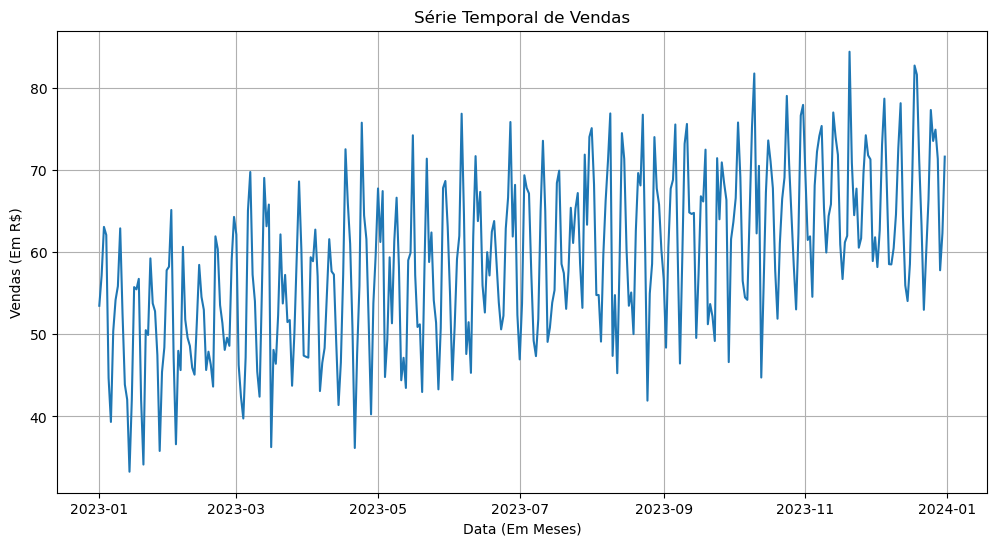

In [35]:
# Criar gráfico da serie temporal
plt.figure(figsize= (12,6))
plt.plot(serie_temporal)
plt.xlabel('Data (Em Meses)')
plt.ylabel('Vendas (Em R$)')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.show()

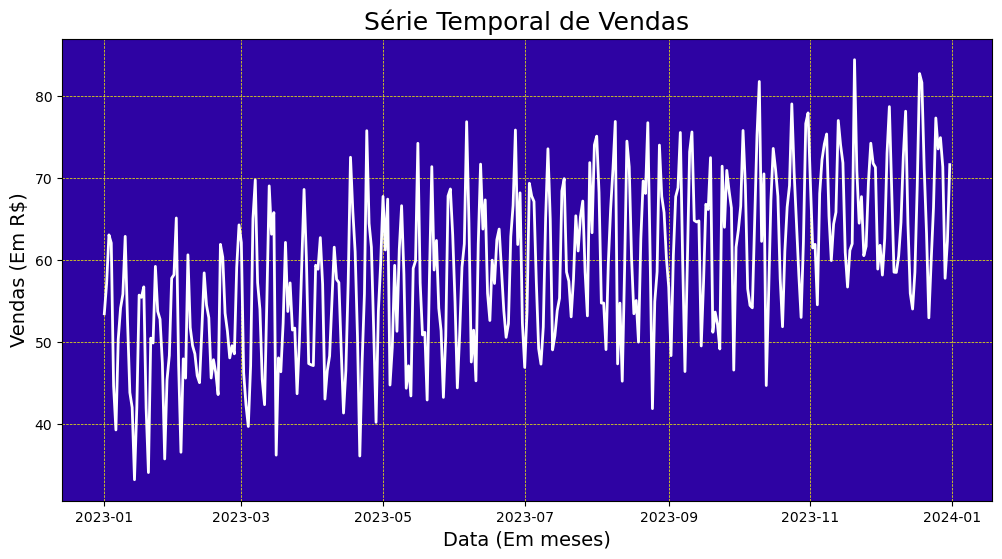

In [36]:
# criar gráfico da serie temporal (com formatação)

plt.figure(figsize= (12,6))
plt.plot(serie_temporal, color= 'white', linewidth = 2)

plt.gca().set_facecolor('#2e03a3')
plt.grid(color = 'yellow', linestyle = '--', linewidth =0.5)

plt.xlabel('Data (Em meses)', color = 'black', fontsize = 14)
plt.ylabel('Vendas (Em R$)', color = 'black', fontsize = 14)
plt.title('Série Temporal de Vendas', color = 'black', fontsize = 18)

plt.tick_params(axis= 'x', colors = 'black')
plt.tick_params(axis= 'y', colors = 'black')

plt.show()

In [39]:
# Criar o modelo de Suaviação Exponencial
modelo = SimpleExpSmoothing(serie_temporal)

In [40]:
# Treinamento (ajuste) do modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.2)

c:\Users\lucca\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [41]:
# Extração dos valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

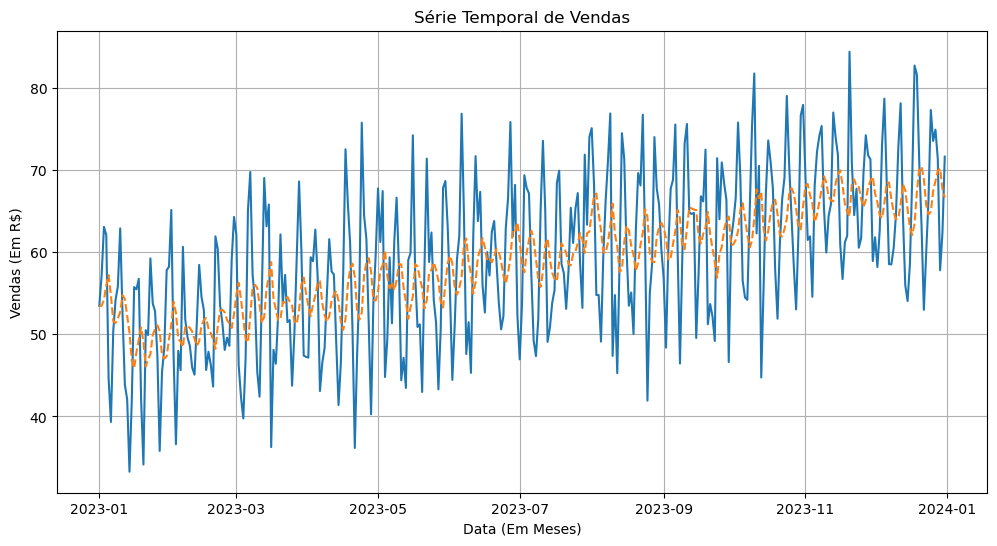

In [42]:
# Criar gráfico da serie temporal
plt.figure(figsize= (12,6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label = 'Valores Previstos', linestyle = '--')
plt.xlabel('Data (Em Meses)')
plt.ylabel('Vendas (Em R$)')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.show()

In [43]:
# Fazer previsões
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps= num_previsoes)

In [45]:
print('Previsão do total de vendar para Janeiro/2024:', round(previsoes[0], 4))

Previsão do total de vendar para Janeiro/2024: 67.6499


C:\Users\lucca\AppData\Local\Temp\ipykernel_14448\2323505554.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Previsão do total de vendar para Janeiro/2024:', round(previsoes[0], 4))


# Fim